# Introdução

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos a você foi modificado do original. Reduzimos o tamanho do conjunto de dados para que seus cálculos sejam executados mais rapidamente e introduzimos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos intermédios a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar os dados e fazer a AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [1]:
import pandas as pd

In [2]:
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/order_products.csv',sep=';')

In [3]:
print(instacart_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [4]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [5]:
print(order_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


In [6]:
print(aisles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [7]:
print(departments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


## Conclusões

Ambas os datas tem valores ausentes e possives dados dublicados.

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `orders`

In [8]:
# Verificar se há pedidos duplicados
duplicated_orders = instacart_orders.duplicated(subset=['order_id'], keep=False)
print(f"Há {duplicated_orders.sum()} pedidos duplicados.")

Há 30 pedidos duplicados.


Há linhas duplicadas? Se sim, o que elas têm em comum?

In [9]:
wednesday_orders = instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]
print(f"Há {len(wednesday_orders)} pedidos feitos às 2h da manhã nas quartas-feiras.")

# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

Há 121 pedidos feitos às 2h da manhã nas quartas-feiras.


O que esse resultado quer dizer?

In [10]:
instacart_orders = instacart_orders.drop_duplicates()
print(instacart_orders)
# Remova pedidos duplicados

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [11]:
duplicates = instacart_orders.duplicated()

print(f"O total de duplicados atualizados é {duplicates.sum()}.")
# Verifique as linhas duplicadas mais uma vez

O total de duplicados atualizados é 0.


In [12]:
duplicates = instacart_orders['order_id'].duplicated()

print(f"O total de ID de pedidos: {duplicates.sum()}.")
# Verifique novamente apenas os IDs de pedidos duplicados

O total de ID de pedidos: 0.


Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `products`

In [13]:
du_products = products.duplicated().sum()
print(du_products)

0


In [14]:
duplicates = products['product_id'].duplicated()

print(f"O total de ID de pedidos: {duplicates.sum()}.")

# Verifique apenas se há IDs de departamentos duplicados

O total de ID de pedidos: 0.


In [15]:

products['product_name'] = products['product_name'].str.lower()

print(f"Total de nomes de produtos duplicados: {products['product_name'].duplicated().sum()}.")
# Verifique apenas se há nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)


Total de nomes de produtos duplicados: 1361.


In [16]:
print(products.dropna(subset=['product_name']))
# Verifique os nomes de produtos duplicados que não estão faltando

       product_id                                       product_name  \
0               1                         chocolate sandwich cookies   
1               2                                   all-seasons salt   
2               3               robust golden unsweetened oolong tea   
3               4  smart ones classic favorites mini rigatoni wit...   
4               5                          green chile anytime sauce   
...           ...                                                ...   
49689       49690                      high performance energy drink   
49690       49691                      original pancake & waffle mix   
49691       49692    organic instant oatmeal light maple brown sugar   
49692       49693                             spring water body wash   
49693       49694                            burrito- steak & cheese   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `departments`

In [17]:
print(f"linhas completamente duplicadas: {departments.duplicated().sum()}.")
# Verifique se há linhas completamente duplicadas

linhas completamente duplicadas: 0.


In [18]:
duplicated_ids = departments['product_id'].duplicated()
print('Número de IDs de produtos duplicados:', duplicated_ids.sum())

# Verifique apenas se há IDs dos produtos duplicados

Número de IDs de produtos duplicados: 4499434


Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `aisles`

In [19]:
print(f"linhas completamente duplicadas: {aisles.duplicated().sum()}.")
# Verifique se há linhas completamente duplicadas

linhas completamente duplicadas: 0.


In [20]:
duplicates = aisles['aisle_id'].duplicated()
print('Há IDs de produtos duplicados:',duplicates.sum())

# Verifique apenas se há IDs dos produtos duplicados

Há IDs de produtos duplicados: 0


Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `order_products`

In [21]:
print(f"linhas completamente duplicadas: {order_products.duplicated().sum()}.")
# Verifique se há linhas completamente duplicadas

linhas completamente duplicadas: 0.


In [22]:
duplicates = order_products['order_id'].duplicated()
print('Há IDs de produtos duplicados:',duplicates.sum())
# Verifique mais uma vez se há outros casos complicados de duplicados

Há IDs de produtos duplicados: 4094961


## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [23]:
print("total de valores ausentes na coluna 'product_name':", products['product_name'].isna().sum())


total de valores ausentes na coluna 'product_name': 1258


mestodo isna() verica valores ausente som

In [24]:
product_name = products[products['product_name'].isnull()]
all_100 = all(product_name['department_id'] == 100)

print(f"Essa informação é {all_100}.")


Essa informação é False.


A função all() do Python retorna True se todos os elementos são verdadeiros.

In [25]:
product_name = products[products['product_name'].isnull()]
all_21 = all(product_name['department_id'] == 21)

print(f"Essa informação é {all_21}.")


Essa informação é True.


A função all() do Python retorna True se todos os elementos são verdadeiros.

In [26]:
uni = products[(products['aisle_id'] == 100) & (products['department_id'] == 21)]
print(uni)



       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Corrigido!!!!

In [27]:
print(product_name['product_name'].fillna('Unknown',))

# Preencha nomes de produtos ausentes com 'Unknown'

37       Unknown
71       Unknown
109      Unknown
296      Unknown
416      Unknown
          ...   
49552    Unknown
49574    Unknown
49640    Unknown
49663    Unknown
49668    Unknown
Name: product_name, Length: 1258, dtype: object


Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `orders`

In [28]:
print("total de valores ausentes:", instacart_orders['days_since_prior_order'].isna().sum())
# Encontre os valores ausentes

total de valores ausentes: 28817


In [29]:

num_m = instacart_orders['days_since_prior_order'].isna().sum()
num_f = (instacart_orders['order_number'] == 1).sum()

if num_m == num_f:
    print("Os valores ausentes são dos clientes que estão fazendo seu primeiro pedido.")
else:
    print("Há valores ausentes para os clientes que não estão fazendo o primeiro pedido.")


# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?

Os valores ausentes são dos clientes que estão fazendo seu primeiro pedido.


Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `order_products`

In [30]:
print("total de valores ausentes:", order_products['add_to_cart_order'].isna().sum())
# Encontre os valores ausentes

total de valores ausentes: 836


In [31]:
mins = order_products['add_to_cart_order'].min()
maxs = order_products['add_to_cart_order'].max()

print(f"Maximo:{maxs} \nMinimo:{mins}")
# Quais são os valores mínimo e máximo dessa coluna?

Maximo:64.0 
Minimo:1.0


Descreva brevemente suas conclusões.

In [32]:
values = order_products['add_to_cart_order'].isna()
values = order_products[values]
o_values = values['order_id'].unique()

print(o_values)

# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
df_na = order_products[order_products.isna().any(axis=1)]
order_counts = df_na.groupby('order_id')['product_id'].count()
all_64 = order_counts.min() > 64

print('É',all_64)
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem


É False


Tive que usar a função any() para excutar 

In [34]:
order_products['add_to_cart_order'].fillna('999', inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

print(order_products['add_to_cart_order'])
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos por cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [35]:
print(instacart_orders['order_hour_of_day'].describe())

count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64


In [36]:
print(instacart_orders['order_dow'].describe())

count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64


Escreva suas conclusões aqui

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

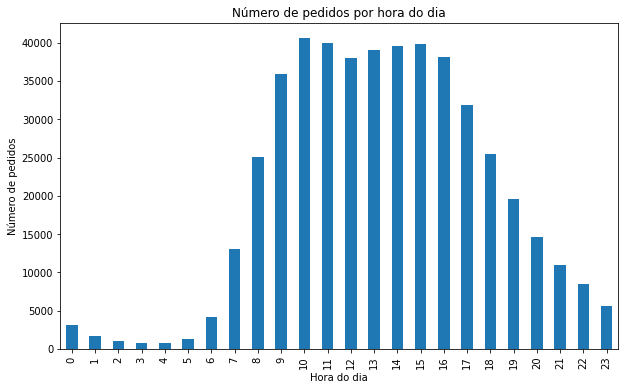

In [37]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
instacart_orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Hora do dia')
plt.ylabel('Número de pedidos')
plt.title('Número de pedidos por hora do dia')
plt.show()


Escreva suas conclusões aqui

### [A3] Em que dia da semana as pessoas fazem compras?

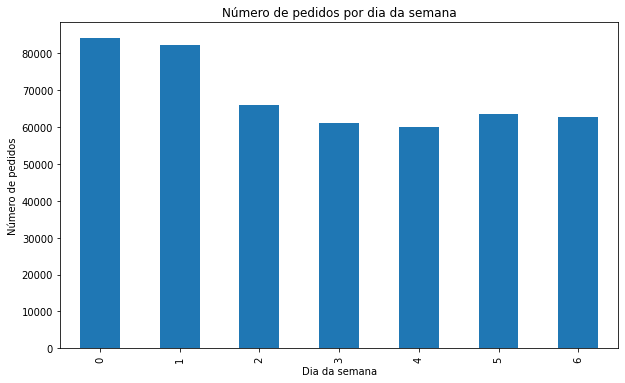

In [38]:
plt.figure(figsize=(10,6))
instacart_orders['order_dow'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Dia da semana')
plt.ylabel('Número de pedidos')
plt.title('Número de pedidos por dia da semana')
plt.show()


Escreva suas conclusões aqui

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui

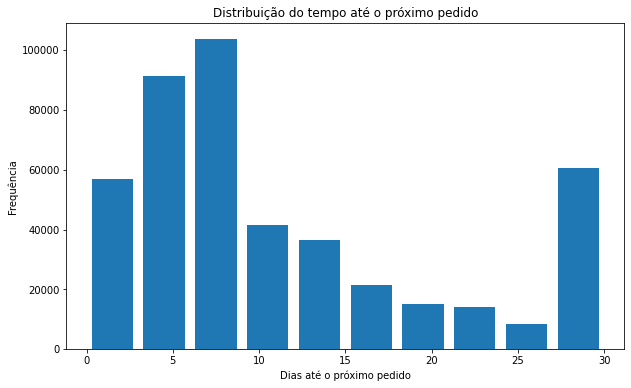

In [39]:
plt.figure(figsize=(10,6))
instacart_orders['days_since_prior_order'].plot(kind='hist', rwidth=0.8)
plt.xlabel('Dias até o próximo pedido')
plt.ylabel('Frequência')
plt.title('Distribuição do tempo até o próximo pedido')
plt.show()

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

In [40]:
w_orders = instacart_orders[instacart_orders['order_dow'] == 2]['order_hour_of_day']

In [41]:
s_orders = instacart_orders[instacart_orders['order_dow'] == 5]['order_hour_of_day']

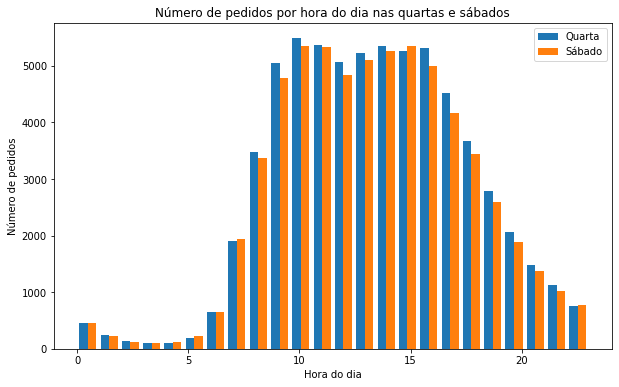

In [42]:
plt.figure(figsize=(10,6))
plt.hist([w_orders, s_orders], bins=24, label=['Quarta', 'Sábado'])
plt.xlabel('Hora do dia')
plt.ylabel('Número de pedidos')
plt.title('Número de pedidos por hora do dia nas quartas e sábados')
plt.legend(loc='upper right')
plt.show()

Dias de quarta-feira proximo das 10hrs tem o maior numero de pedido.

### [B2] Qual é a distribuição do número de pedidos por cliente?

In [43]:
import matplotlib.pyplot as plt

counts = instacart_orders['user_id'].value_counts()

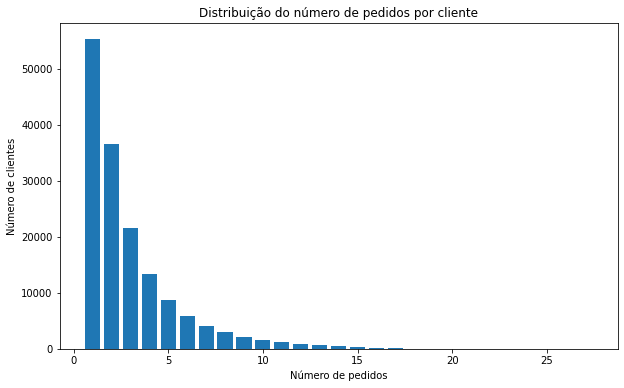

In [44]:
plt.figure(figsize=(10,6))
plt.hist(counts, bins=range(1, counts.max()+1), align='left', rwidth=0.8)
plt.xlabel('Número de pedidos')
plt.ylabel('Número de clientes')
plt.title('Distribuição do número de pedidos por cliente')
plt.show()

Escreva suas conclusões aqui

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [59]:
product_counts = products['product_id'].value_counts().rename('order_count')

In [60]:
top_20_products = product_counts.head(20)


In [61]:
top_20_products = product_counts.reset_index().merge(products, left_on='index', right_on='product_id')[['product_id', 'product_name', 'order_count']]

top_20_products = top_20_products.sort_values(by='order_count', ascending=False)

print(top_20_products)

       product_id                              product_name  order_count
0            2049                            malbec mendoza            1
33145       45078                              pomegranatea            1
33123          32             nacho cheese white bean chips            1
33124       49176            cinnamon roll dough with icing            1
33125       24588                                       NaN            1
...           ...                                       ...          ...
16567       12282       italian lentil soup w/ fresh tomato            1
16568       10235      honey bunches of oats roasted cereal            1
16569        8188                     wisconsin cheese edam            1
16570        6141                     low sodium beef broth            1
49693        2047  fudge sticks jumbo peanut butter cookies            1

[49694 rows x 3 columns]


Corrigido!!

In [63]:
df_merge = order_products.merge(products, on='product_id')
top_products = df_merge.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)
top_products.head(20)

product_id  product_name            
24852       banana                      66050
13176       bag of organic bananas      53297
21137       organic strawberries        37039
21903       organic baby spinach        33971
47209       organic hass avocado        29773
47766       organic avocado             24689
47626       large lemon                 21495
16797       strawberries                20018
26209       limes                       19690
27845       organic whole milk          19600
27966       organic raspberries         19197
22935       organic yellow onion        15898
24964       organic garlic              15292
45007       organic zucchini            14584
39275       organic blueberries         13879
49683       cucumber kirby              13675
28204       organic fuji apple          12544
5876        organic lemon               12232
8277        apple honeycrisp organic    11993
40706       organic grape tomatoes      11781
dtype: int64

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [48]:
order_sizes = order_products.groupby('order_id')['product_id'].count()

In [49]:
mode_size = order_sizes.mode()[0]

In [50]:
print(f"Moda de itens por pedido: {mode_size}")

Moda de itens por pedido: 5


Escreva suas conclusões aqui

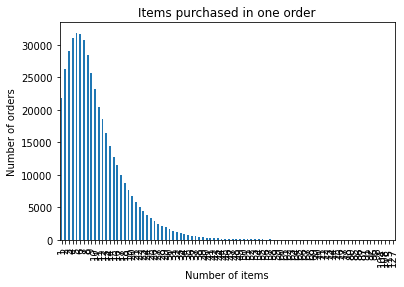

In [51]:
num_items = order_products.groupby('order_id').count()['product_id']
histogram_vals = num_items.value_counts().sort_index()
histogram_vals.plot(kind='bar',
                title='Items purchased in one order',
                xlabel='Number of items',
                ylabel='Number of orders'
               )
plt.show()

### [C2] Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

In [52]:
# Filtrar para apenas produtos em pedidos repetidos
reordered_products = order_products[order_products['reordered'] == 1]

# Obter os 20 principais produtos
top_20_reordered_items = reordered_products['product_id'].value_counts().head(20)

# Obter os nomes dos produtos
for product_id in top_20_reordered_items.index:
    product_name = products[products['product_id'] == product_id]['product_name'].values[0]
    print(f'Product ID: {product_id}, Product Name: {product_name}')


Product ID: 24852, Product Name: banana
Product ID: 13176, Product Name: bag of organic bananas
Product ID: 21137, Product Name: organic strawberries
Product ID: 21903, Product Name: organic baby spinach
Product ID: 47209, Product Name: organic hass avocado
Product ID: 47766, Product Name: organic avocado
Product ID: 27845, Product Name: organic whole milk
Product ID: 47626, Product Name: large lemon
Product ID: 27966, Product Name: organic raspberries
Product ID: 16797, Product Name: strawberries
Product ID: 26209, Product Name: limes
Product ID: 22935, Product Name: organic yellow onion
Product ID: 24964, Product Name: organic garlic
Product ID: 45007, Product Name: organic zucchini
Product ID: 49683, Product Name: cucumber kirby
Product ID: 28204, Product Name: organic fuji apple
Product ID: 8277, Product Name: apple honeycrisp organic
Product ID: 39275, Product Name: organic blueberries
Product ID: 5876, Product Name: organic lemon
Product ID: 49235, Product Name: organic half & ha

Escreva suas conclusões aqui

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [53]:

reorder_ratio = order_products.groupby('product_id')['reordered'].mean()


reorder_ratio = reorder_ratio.reset_index()


reorder_ratio.columns = ['product_id', 'reorder_ratio']


product_reorder_ratio = pd.merge(reorder_ratio, products[['product_id', 'product_name']], on='product_id')



print(reorder_ratio)

       product_id  reorder_ratio
0               1       0.564286
1               2       0.000000
2               3       0.738095
3               4       0.510204
4               7       0.500000
...           ...            ...
45568       49690       0.800000
45569       49691       0.430556
45570       49692       0.416667
45571       49693       0.440000
45572       49694       0.333333

[45573 rows x 2 columns]


Escreva suas conclusões aqui

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [54]:


merged_df = pd.merge(order_products, instacart_orders, on='order_id', how='left')


reorder_ratio = merged_df.groupby('user_id')['reordered'].mean()


reorder_ratio = reorder_ratio.reset_index()


reorder_ratio.columns = ['id', 'reorder_ratio']


print(reorder_ratio)



            id  reorder_ratio
0            2       0.038462
1            4       0.000000
2            5       0.666667
3            6       0.000000
4            7       0.928571
...        ...            ...
149621  206203       0.222222
149622  206206       0.714286
149623  206207       0.891304
149624  206208       0.696000
149625  206209       0.320000

[149626 rows x 2 columns]


Escreva suas conclusões aqui

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [55]:
first_added = order_products[order_products['add_to_cart_order'] == 1]
top_20_items = first_added['product_id'].value_counts().head(20)

In [56]:
top_20_items = top_20_items.reset_index()
top_20_items.columns = ['product_id', 'times_added_first']

In [57]:
top_20_items = top_20_items.merge(products, on='product_id', how='left')

top_20_items

,product_id,times_added_first,product_name,aisle_id,department_id
0,24852,15562,banana,24,4
1,13176,11026,bag of organic bananas,24,4
2,27845,4363,organic whole milk,84,16
3,21137,3946,organic strawberries,24,4
4,47209,3390,organic hass avocado,24,4
5,21903,3336,organic baby spinach,123,4
6,47766,3044,organic avocado,24,4
7,19660,2336,spring water,115,7
8,16797,2308,strawberries,24,4
9,27966,2024,organic raspberries,123,4


Escreva suas conclusões aqui

# Conclusão geral do projeto:

In [58]:
print("Fique um tanto confuso, não estava entendendo os enuciados pois era muito vago para algo muito complexo")

Fique um tanto confuso, não estava entendendo os enuciados pois era muito vago para algo muito complexo
